# Algorithm of Build Graph

In [1]:
import torch
from core.model import MetaLearner

Load the Domain Knowledge

In [2]:
from domains.scene.objects_domain import objects_executor
domains = [objects_executor]

29 13:26:32 Function exists automatically registered.
29 13:26:32 Function forall automatically registered.
29 13:26:32 Function iota automatically registered.
29 13:26:32 Function negate automatically registered.
29 13:26:32 Function logic_and automatically registered.
29 13:26:32 Function logic_or automatically registered.
29 13:26:32 Function count automatically registered.
29 13:26:32 Function scene automatically registered.
29 13:26:32 Function red automatically registered.
29 13:26:32 Function green automatically registered.
29 13:26:32 Function blue automatically registered.
29 13:26:32 Function circle automatically registered.
29 13:26:32 Function rectangle automatically registered.
29 13:26:32 Function triangle automatically registered.
29 13:26:32 Function left automatically registered.
29 13:26:32 Function right automatically registered.


Create the MetaLearner

In [3]:
model = MetaLearner(domains, vocab = ["red", "object"])

29 13:26:32 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
29 13:26:32 WRN `RewriteExecutor` The input domain is empty, creating an empty domain


In [4]:
exprs = model.parse_display("red object", topK = 10)

expr, weight =  exprs[0]
print("expr:{}\nweight:{}".format(expr, weight))
expr = model.executor.parse_expression(str(expr))



metas = model.infer_metaphor_expressions(expr)
pass

print(metas)

exists:Objects(iota:Objects(scene:Objects())), 0.17
forall:Objects(iota:Objects(scene:Objects())), 0.10
exists:Objects(green:Objects(scene:Objects())), 0.07
forall:Objects(green:Objects(scene:Objects())), 0.07
exists:Objects(blue:Objects(scene:Objects())), 0.06
exists:Objects(red:Objects(scene:Objects())), 0.06
exists:Objects(red:Objects(scene:Objects())), 0.04
negate:Objects(exists:Objects(scene:Objects())), 0.04
forall:Objects(red:Objects(scene:Objects())), 0.04
exists:Objects(scene:Objects()), 0.04


expr:exists:Objects(iota:Objects(scene:Objects()))
weight:-1.7638537883758545
[[]]


## Visualizer of the Rewrite Graph

In [ ]:



from core.metaphors.types import RuleBasedTransformInferer, infer_mlp_caster
from core.metaphors.executor import ExecutorGroup
from domains.scene.objects_domain import objects_executor
from domains.spatial.direction_domain import direction_executor
from domains.math.integer_domain import integer_executor
from domains.structure.path_domain import path_executor
from core.metaphors.executor import SearchExecutor

executor_group = ExecutorGroup([\
    objects_executor,
    direction_executor,
    integer_executor,
    path_executor])
executor = SearchExecutor(executor_group)

## path1 plus path2
## failed to rewrite from ?f path x path -> plus ?x ?y -> int
## create new function plus  path x path ->

## path1 connect to path2

## scene inputs are dynamical

out = executor.evaluate("minus:Integer(one:Integer(), two:Integer())", {})

query = "east:Direction(one:Integer(), two:Integer())"

 


29 13:26:32 Function north automatically registered.
29 13:26:32 Function south automatically registered.
29 13:26:32 Function east automatically registered.
29 13:26:32 Function west automatically registered.
29 13:26:32 Function northeast automatically registered.
29 13:26:32 Function northwest automatically registered.
29 13:26:32 Function southeast automatically registered.
29 13:26:32 Function southwest automatically registered.
29 13:26:32 Function one automatically registered.
29 13:26:32 Function two automatically registered.
29 13:26:32 Function three automatically registered.
29 13:26:32 Function plus automatically registered.
29 13:26:32 Function minus automatically registered.
29 13:26:32 Function avg automatically registered.
29 13:26:32 Function smaller automatically registered.
29 13:26:32 Function bigger automatically registered.
29 13:26:32 Function N automatically registered.
29 13:26:32 Function Z automatically registered.
29 13:26:32 Function subset automatically re

smaller:Integer@east:Direction by frame:floatxfloat->Vector[float,2]xVector[float,2]_0
bigger:Integer@east:Direction by frame:floatxfloat->Vector[float,2]xVector[float,2]_1
update chain
failed to unify east:Direction([Value:[1.0000]-float P:[1.0], Value:[2.0000]-float P:[1.0]]->0.0)
Left structure: east:Direction
Right structure: [Value:[1.0000]-float P:[1.0], Value:[2.0000]-float P:[1.0]]
(Value:[-4.3597]-bool P:[1.0], tensor(0.5853, grad_fn=<AddBackward0>))


In [7]:

optim = torch.optim.Adam(executor.parameters(), lr = 1e-2)
executor.supressed = 1
for epoch in range(30):
    out, inherent_loss = executor.evaluate(query, {})
    loss = 0.
    loss = torch.nn.functional.binary_cross_entropy(torch.sigmoid(out.value), torch.tensor(1.))
    loss += inherent_loss

    loss.backward()
    optim.step()

out = executor.evaluate(query, {})

print(out)

(Value:[5.7057]-bool P:[1.0], tensor(0.0121, grad_fn=<AddBackward0>))


In [8]:
def tree_layout(tree, root=None):
    if root is None:
        root = next(iter(tree.nodes))  # Assume first node is root
    
    # Compute depth (level) of each node
    depths = {root: 0}
    queue = [root]
    while queue:
        node = queue.pop(0)
        for child in tree.neighbors(node):
            if child not in depths:
                depths[child] = depths[node] + 1
                queue.append(child)
    
    # Group nodes by depth
    levels = {}
    for node, depth in depths.items():
        levels.setdefault(depth, []).append(node)
    
    # Assign positions: x = index in level, y = -depth (top-down)
    pos = {}
    for depth, nodes in levels.items():
        for i, node in enumerate(nodes):
            pos[node] = (i, -depth)  # Negative y for top-down layout
    return pos



In [9]:
import matplotlib.pyplot as plt
import networkx as nx
def visualize_graph(graph: nx.DiGraph):

    #pos = nx.shell_layout(graph)
    pos = nx.spring_layout(graph, seed=42, iterations=50, weight='weight', k=0.3)
    pos = nx.kamada_kawai_layout(graph, scale=2)
    pos = tree_layout(graph)

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    

    labels = nx.get_node_attributes(graph, 'label')
    nx.draw_networkx_labels(graph, pos, labels, font_size=8)
    

    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), arrowstyle='->', width=2)
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weights, font_size=6)
    
    plt.title("DFS")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

[SearchNode(fn='super_source', value=None, src=None, maintain=None, distr=tensor(0.), reachable=1.0), SearchNode(fn='one:Integer', value=[], src=None, maintain=1, distr=1.0, reachable=1.0)]
106
DiGraph with 5 nodes and 4 edges


/var/folders/ms/qbhhrxd119555wkjspljcjcc0000gn/T/ipykernel_33085/1329165837.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_label += f"\n{[str((torch.round(torch.tensor(v.value)*100)/100.).detach().numpy()) for v in current_node.value]}"
/var/folders/ms/qbhhrxd119555wkjspljcjcc0000gn/T/ipykernel_33085/1329165837.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph.add_edge(str(current_node), str(next_node), weight=torch.tensor(weight).detach().numpy())


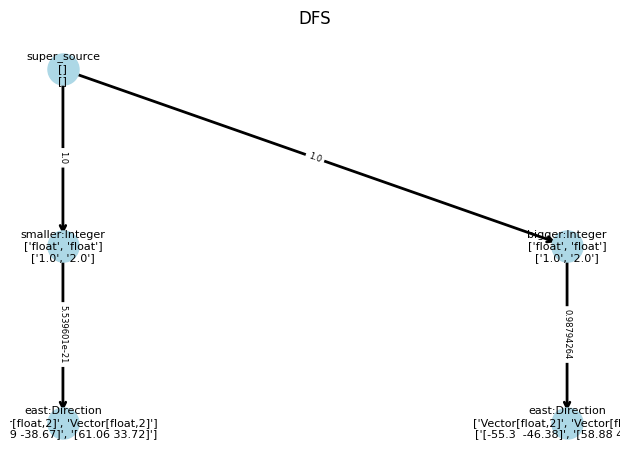

In [12]:
trees = executor.storage.query_trees

print(trees[0][2])
print(len(trees))
graph = executor.storage.create_graph(trees[-1][2])

print(graph)
visualize_graph(graph)